### Example: Classifying NEWSGROUPS

  #naive Bayes is often used is in text classification, where

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
# I select a subset of all available categories. 
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space',
              'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories )
test = fetch_20newsgroups(subset='test', categories=categories)
# news emails has some headers and footer which affect classification . 
# remove them to see a realistic classification 


In [4]:
print(train.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [6]:
# HW follow the BOOK Python Data Science Hand BOOK
# 0) Analyse the train set. How are the samples distributed among samples?
# 1) Complete the example analysis in Chapter 5: NAIVE BAYES Section (Text Classification Example)
# 2) Print the classification report

#3) Print two mis-classified samples

# 4) Print confusion matrix, comment on the results, which category was best classified?
# 5) Repeat training and test for KNN.

#6) Tune the  K value on train, test in on Test.
# 6) Comment on the results.

In [7]:
train.target_names

['comp.graphics', 'sci.space', 'soc.religion.christian', 'talk.religion.misc']

In [8]:
# 0) Analyse the train set. How are the samples distributed among samples?
X_train = train['data']
y_train = train['target']
X_test = test['data']
y_test = test['target']

Text(0.5, 0, "['comp.graphics', 'sci.space', 'soc.religion.christian', 'talk.religion.misc']")

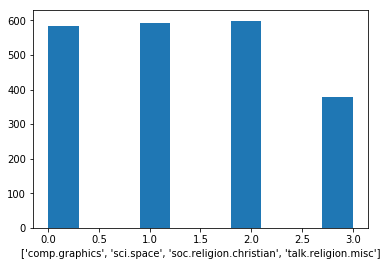

In [9]:
plt.hist(y_train)
plt.xlabel(train.target_names)

As we can see we have over 500 samples  for categories = 'comp.graphics', 'sci.space', 'soc.religion.christian' and near 400 samples for 'talk.religion.misc'

Text(0.5, 0, "['comp.graphics', 'sci.space', 'soc.religion.christian', 'talk.religion.misc']")

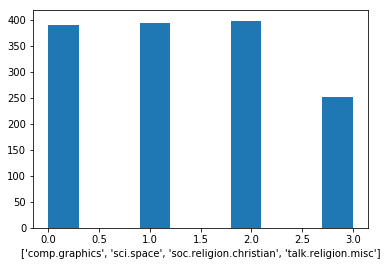

In [10]:
plt.hist(y_test)
plt.xlabel(train.target_names)

Similar distribution in test 

In [11]:
#1) Complete the example analysis in Chapter 5: NAIVE BAYES Section (Text Classification Example)
model.fit(X_train, y_train)
pred_train = model.predict(X_train)

from sklearn.metrics import classification_report

cr = classification_report(y_train, pred_train)
print("Train \n", cr)

Train 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       584
           1       0.98      0.99      0.99       593
           2       0.74      1.00      0.85       599
           3       1.00      0.44      0.61       377

   micro avg       0.90      0.90      0.90      2153
   macro avg       0.93      0.85      0.86      2153
weighted avg       0.92      0.90      0.88      2153



In [12]:
# training does not look bad, but note that precision and recall values for class 2 and 3 is not so good. 
# perhaps they were confused with each other 

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_train, pred_train)
print(mat)

[[575   3   6   0]
 [  0 589   4   0]
 [  0   0 599   0]
 [  1   7 203 166]]


As we can see above in the confusion matrix, 'talk.religion.misc' was significantly confused with soc.religion.christian'. Probably due to closeness of the words.

In [13]:
pred_test = model.predict(X_test)

cr = classification_report(y_test, pred_test)
print("Test \n", cr)

mat = confusion_matrix(y_test, pred_test)
print(mat)

Test 
               precision    recall  f1-score   support

           0       0.97      0.88      0.92       389
           1       0.92      0.92      0.92       394
           2       0.62      0.98      0.76       398
           3       1.00      0.19      0.32       251

   micro avg       0.80      0.80      0.80      1432
   macro avg       0.88      0.75      0.73      1432
weighted avg       0.86      0.80      0.77      1432

[[344  13  32   0]
 [  6 364  24   0]
 [  1   5 392   0]
 [  4  12 187  48]]


**Comp.graph and Sci is best classified classes with 0.92 f-scores.**

**Same here. The recall rate of talk.religion.misc is really small. It was confused with soc.religion.christian.**


In [14]:

#Lets print some misclassified examples. 

In [15]:
X_test_ar = np.array(X_test)
confused_X_talk_religion = X_test_ar[np.logical_and(y_test==3,pred_test==3)]
print(confused_X_talk_religion.shape)

(48,)


In [16]:
print(confused_X_talk_religion[0])

From: sandvik@newton.apple.com (Kent Sandvik)
Subject: Re: To Rob Lanphier
Organization: Cookamunga Tourist Bureau
Lines: 23

In article <1993Apr22.003024.25620@organpipe.uug.arizona.edu>,
brian@lpl.arizona.edu (Brian Ceccarelli 602/621-9615) wrote:
> My hope is that Brian will look and will see the ramifications of the
> truck coming towards him.  My hope is that Brian will want to step out
> of the way.  My fear, though,  is that Brian will instead choose to glue himself
> to the middle of the highway, where he will certainly get run over.  But if
> he so chooses, he so chooses, and there is nothing I can do beyond that
> to change his mind.   For it is his choice.   But at this very moment,
> Brian hasn't gotten even that far.  He is still at the point where he
> does not want to look.  Sure he moves his eyeball to appease me, but his
> head will not turn around to see the entire picture.  So far he is
> satisfied with his glimpse of the mountains off in the distance. 


The problem

In [17]:
confused_X_comp_grp = X_test_ar[np.logical_and(y_test==1,pred_test==2)]
print(confused_X_comp_grp[0])

From: mckay@alcor.concordia.ca (John McKay)
Subject: Re: Math?? (Was US govt & Technolgy Investment
Keywords: science?
Nntp-Posting-Host: alcor.concordia.ca
Organization: Concordia University, Montreal, Canada
Lines: 21

mwilson@ncratl.AtlantaGA.NCR.COM (Mark Wilson) writes:

>|>Report called it The Science of Order, but that's probably pomposity.

>|It is, however, now somewhat of an experimental science with the exploration
>|of fractals, strange attractors, and artificial life. Whether important
>|insights will be gained from these experiments is unknown, but it does
>|tend to change the shape of what has mostly been viewed as an abstract
>|deductive field.

>How do you do experiments in mathematics?
Well ...
Have a look at a new journal: Journal of Experimental Mathematics
It has several Fields medallists on its editorial board.
You want to knwo more?
Try Klaus Peters in Boston or David Epstein at Warwick .

-- 
Deep ideas are simple.
                      Odd groups are even.
    

In [18]:
def predict_category(s, trgt_names, model=model):            
    pred = model.predict([s])            
    return trgt_names[pred[0]]

print()
print(predict_category('I believe in god', train.target_names, model))
print(predict_category('I like computers', train.target_names, model))
print(predict_category('I believe in computers', train.target_names, model))
print(predict_category('Believe or not I bought a computer with nvidia gtxyz1000', train.target_names, model))
print()


soc.religion.christian
comp.graphics
soc.religion.christian
soc.religion.christian



### NOW REPEAT WITH KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier as knn


model = make_pipeline(TfidfVectorizer(), knn(n_neighbors=5))
model.fit(X_train,y_train)

pred_test = model.predict(X_test)

cr = classification_report(y_test, pred_test)
print("Test \n", cr)

mat = confusion_matrix(y_test, pred_test)
print(mat)


Test 
               precision    recall  f1-score   support

           0       0.91      0.81      0.86       389
           1       0.90      0.85      0.87       394
           2       0.71      0.89      0.79       398
           3       0.77      0.65      0.71       251

   micro avg       0.82      0.82      0.82      1432
   macro avg       0.82      0.80      0.81      1432
weighted avg       0.83      0.82      0.82      1432

[[317  18  38  16]
 [ 24 333  35   2]
 [  3   8 356  31]
 [  6  10  71 164]]


### NBayes
[[344  13  32   0]
 [  6 364  24   0]
 [  1   5 392   0]
 [  4  12 187  48]]
 
 ### KNN
 [[317  18  38  16]
 [ 24 333  35   2]
 [  3   8 356  31]
 [  6  10  71 164]]
 
 With k=5 five
 It can be seen that f-1 scores are worse in KNN compared to Naive Bayes. 
 Confusion matrix shows that misclassifications are spread. 
 


In [20]:
## To find best K
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split, cross_val_score

k_vals=[1,3,5,7,9,13]

for k in k_vals:
    model = make_pipeline(TfidfVectorizer(), knn(n_neighbors=k))
    
    
    # instead of doing below I will use cross val score
    #[x_tr, y_tr, x_val, y_val] = train_test_split(X_train,y_train, 0.1)
    #model.fit(X_tr,y_tr)
    #pred_val = model.predict(x_val)
    cv_score = cross_val_score(model,X_train,y_train, cv=5)
    print("For ",k," val: ", cv_score)
    print("Accuracy: %0.2f (+/- %0.2f)" % (cv_score.mean(), cv_score.std() * 2))


For  1  val:  [0.91666667 0.9212963  0.91183295 0.90465116 0.92757009]
Accuracy: 0.92 (+/- 0.02)
For  3  val:  [0.90972222 0.8912037  0.91183295 0.9        0.90654206]
Accuracy: 0.90 (+/- 0.01)
For  5  val:  [0.90046296 0.90972222 0.9025522  0.89302326 0.89953271]
Accuracy: 0.90 (+/- 0.01)
For  7  val:  [0.89814815 0.88657407 0.89327146 0.88837209 0.89719626]
Accuracy: 0.89 (+/- 0.01)
For  9  val:  [0.87268519 0.88425926 0.87935035 0.88139535 0.87383178]
Accuracy: 0.88 (+/- 0.01)
For  13  val:  [0.8587963  0.87268519 0.87470998 0.84651163 0.84579439]
Accuracy: 0.86 (+/- 0.02)


In [21]:
# best k value is 1 
best_model = make_pipeline(TfidfVectorizer(), knn(n_neighbors=1))
best_model.fit(X_train,y_train)
pred_test = best_model.predict(X_test)

cr = classification_report(y_test, pred_test)
print("Test \n", cr)

Test 
               precision    recall  f1-score   support

           0       0.91      0.79      0.85       389
           1       0.87      0.87      0.87       394
           2       0.78      0.88      0.82       398
           3       0.76      0.75      0.75       251

   micro avg       0.83      0.83      0.83      1432
   macro avg       0.83      0.82      0.82      1432
weighted avg       0.83      0.83      0.83      1432



### It seems that KNN works as good as Naive Bayes. Even slightly better if we compare avg prec, recall, f-1 scores

'micro-avg': Calculate metrics globally by counting the total true positives, false negatives and false positives.

KNN micro avg 0.83      0.83      0.83      1432
NB micro avg       0.82      0.82      0.82      1432

In [22]:
## Try the same with SVC

# NOT PART OF THE HOMEWORK

from sklearn.svm import SVC

model = make_pipeline(TfidfVectorizer(), SVC(C=10.0, kernel='rbf', gamma='scale'))
model.fit(X_train,y_train)

pred_test = model.predict(X_test)

cr = classification_report(y_test, pred_test)
print("Test \n", cr)

mat = confusion_matrix(y_test, pred_test)
print(mat)

Test 
               precision    recall  f1-score   support

           0       0.87      0.96      0.92       389
           1       0.95      0.94      0.94       394
           2       0.87      0.94      0.90       398
           3       0.93      0.69      0.79       251

   micro avg       0.90      0.90      0.90      1432
   macro avg       0.91      0.88      0.89      1432
weighted avg       0.90      0.90      0.90      1432

[[375   7   3   4]
 [ 20 369   5   0]
 [ 12   2 374  10]
 [ 22   9  47 173]]


### BEST results obtained by SVM 
### SVC micro avg     0.90      0.90      0.90      1432